In [1]:
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
print("Descriptive Analysis:\n",df.describe(),"\n\n\nDatatypes:\n")
df.info()

Descriptive Analysis:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000 


Datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df = df.drop(['show_id'],axis=1)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Missing Values

In [6]:
df[df['rating'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


## Filling missing values in rating column
1. TV-PG from Netflix
2. TV-14 from IMDB
3. TV-G  from IMDB
4. PG-13 from Google

In [7]:
fill_values = ['TV-PG', 'TV-14', 'TV-G', 'PG-13']
df.loc[df['rating'].isnull(), 'rating'] = fill_values[:len(df[df['rating'].isnull()])]
df.loc[[5989,6827,7312,7537]]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-PG,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,TV-14,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,TV-G,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,PG-13,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [8]:
df[df['duration'].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


## Problem 1 - Duration values in ratings column
1. When checking value_counts() in ratings column. I found few durations in ratings column.
2. After filtering the full records with those values, we can see the duration column values are missing.
   - Solution: 1. Change these 3 values into duration column
               2. After Googling this show is documentary - comedy. And it is not rated.

In [9]:
values_to_change = ['74 min', '84 min', '66 min']
filtered_df = df[df['rating'].isin(values_to_change)]
filtered_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
df.loc[df['rating'].isin(values_to_change), 'duration'] = df['rating']
filtered_df = df[(df['duration'].isin(values_to_change)) & (df['cast'] == 'Louis C.K.')]
filtered_df


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


## Now lets change ratings column values as 'Not Rated'

In [11]:
df.loc[(df['rating'].isin(values_to_change)) & (df['cast'] == 'Louis C.K.'), 'rating'] = 'Not Rated'
df[(df['duration'].isin(values_to_change)) & (df['cast'] == 'Louis C.K.')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Rated,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Rated,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Rated,66 min,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

## Now we only have director,cast,country columns with more values to lets just make them as NA - Not available

In [13]:
df.fillna('NA', inplace=True)
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Unique Values in Each Column

In [21]:
cols = ['type', 'country','release_year', 'rating',  'listed_in']

for column in cols:
    print("Unique values in [",column, "] are :\n\n",df[column].value_counts(),"\n\n")

Unique values in [ type ] are :

 Movie      6131
TV Show    2676
Name: type, dtype: int64 


Unique values in [ country ] are :

 United States                             2818
India                                      972
NA                                         831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64 


Unique values in [ release_year ] are :

 2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64 


Unique values in [ rating ] are :

 TV-MA        3207
TV-14        2161
TV-

## Viz 1 - Movies vs TV shows

## Problem 2 - Multiple value records in country column

1. Some values in country column has multiple countries.
2. Lets get no:of records for each country.
3. Using a dictionary can solve the problem. 
4. The keys have spaces making them as 2 keys for same country. 
    Example :
    - 'Israel': 22,
    - ' Israel': 8
    - Solution - Adding strip() in dict_func()

In [15]:
def dict_func(val):
    val = val.strip() #4 Solution
    if val not in country_values.keys():
        country_values[val]=1
    else:
        country_values[val]+=1

In [16]:
country_value = df['country']
country_values ={}
for i in country_value:
    if "," in i:
        sep = i.split(",")
        for j in sep:
            dict_func(j)
    else:
        dict_func(i)
        
country_values

{'United States': 3690,
 'South Africa': 62,
 'NA': 831,
 'India': 1046,
 'Ghana': 5,
 'Burkina Faso': 1,
 'United Kingdom': 806,
 'Germany': 226,
 'Ethiopia': 1,
 'Czech Republic': 22,
 'Mexico': 169,
 'Turkey': 113,
 'Australia': 160,
 'France': 393,
 'Finland': 11,
 'China': 162,
 'Canada': 445,
 'Japan': 318,
 'Nigeria': 103,
 'Spain': 232,
 'Belgium': 90,
 'South Korea': 231,
 'Singapore': 41,
 'Italy': 100,
 'Romania': 14,
 'Argentina': 91,
 'Venezuela': 4,
 'Hong Kong': 105,
 'Russia': 27,
 '': 7,
 'Ireland': 46,
 'Nepal': 2,
 'New Zealand': 33,
 'Brazil': 97,
 'Greece': 11,
 'Jordan': 9,
 'Colombia': 52,
 'Switzerland': 19,
 'Israel': 30,
 'Taiwan': 89,
 'Bulgaria': 10,
 'Algeria': 3,
 'Poland': 41,
 'Saudi Arabia': 13,
 'Thailand': 70,
 'Indonesia': 90,
 'Egypt': 117,
 'Denmark': 48,
 'Kuwait': 8,
 'Netherlands': 50,
 'Malaysia': 26,
 'Vietnam': 7,
 'Hungary': 11,
 'Sweden': 42,
 'Lebanon': 31,
 'Syria': 3,
 'Philippines': 83,
 'Iceland': 11,
 'United Arab Emirates': 37,
 'Nor

## Viz 2 - country wise distribution of movies / TV shows

## Viz 3 - year wise count of shows or movies in line graph

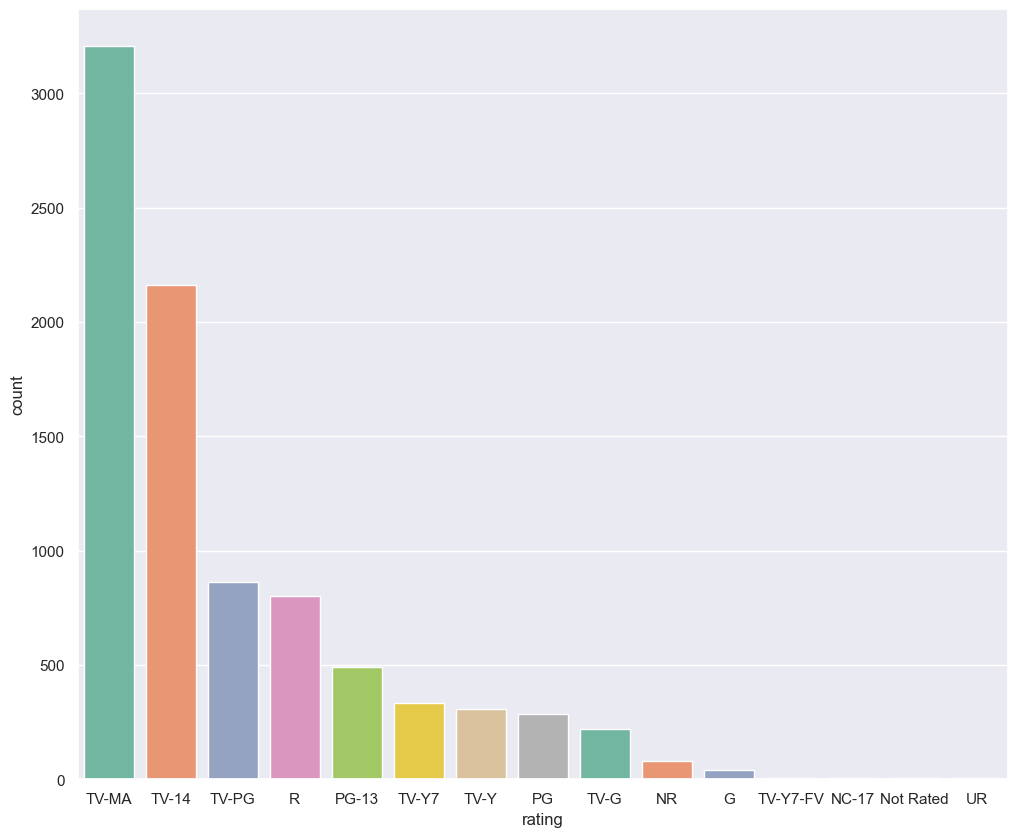

In [17]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

## Problem 2 - Multiple Genre records in column listed_in

1. Some values in this column has multiple genres.
2. Lets get no:of records for each genre.
3. Using a dictionary can solve the problem. 

In [24]:
def dict_func2(val):
    val = val.strip() #4 Solution
    if val not in genre_values.keys():
        genre_values[val]=1
    else:
        genre_values[val]+=1

In [25]:
genre_value = df['listed_in']
genre_value
genre_values ={}
for i in genre_value:
    if "," in i:
        sep = i.split(",")
        for j in sep:
            dict_func2(j)
    else:
        dict_func2(i)
        
genre_values

{'Documentaries': 869,
 'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Mysteries': 98,
 'Crime TV Shows': 470,
 'TV Action & Adventure': 168,
 'Docuseries': 395,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 581,
 'TV Horror': 75,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'British TV Shows': 253,
 'Comedies': 1674,
 'Spanish-Language TV Shows': 174,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'TV Thrillers': 57,
 "Kids' TV": 451,
 'Action & Adventure': 859,
 'TV Sci-Fi & Fantasy': 84,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Anime Series': 176,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'Cult Movies': 71,
 'TV Shows': 16,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 57,
 'Stand-Up Comedy & Talk Shows': 56,
 'Class